## Tarea 1
### Métodos para solucionar ecuaciones diferenciales: Euler, Euler mejorado y Runge-Kutta

1. Los isótopos radiactivos a menudo se introducen en el cuerpo a través de la corriente sanguínea. Su dispersión dentro del cuerpo puede monitorearse detectando la aparición de radiación en diferentes órganos. La tasa de decaimiento o actividad del espécimen es representada por

\begin{equation}
-\frac{dN(T)}{dt} = \lambda N(t)
\end{equation}

donde $\lambda$ es la constante de decaimiento y está relacionada con la vida media del espécimen $(T_{1/2})$ por medio de $T_{1/2}=\frac{ln\,2}{\lambda}$.

Si le han suministrado 10 mg de $^{131}I$, un emisor $\beta^−$ con vida media de 8 días. ¿Cuánto medicamento permanecerá en su organismo al cabo de 40 días?

Comparar los resultados de aplicar el método de Euler, de Euler mejorado y de Runge-Kutta de cuarto orden para encontrar una solución aproximada de N(40 días). Utilice $h = 4$.

La ecuación diferencial que rige el fenómeno ya fue dada. Comencemos por declarar la función para calcular la solución por los distintos métodos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Calcula el lambda a partir de los parámetros dados
l = np.log(2)/(8)
# En este caso la derivadad de la función solo depende de una variable.
f = lambda y: -l*y # y = N(t)

Ahora definimos las funciones para implementar los métodos:

In [2]:
def euler(f, inicio, tiempo, h):
    """
    f: función de la derivada
    inicio: array, tupla o lista con las condiciones iniciales. El primer elemento corresponde
    al tiempo inicial.
    tiempo: float, tiempo final
    h: paso
    """
    
    T = np.arange(inicio[0], tiempo, h)
    Y = np.zeros(len(T))
    
    Y[0] = inicio[1]
    
    #Aplica el método iterativo de Euler
    for i in range(len(T)-1):
        Y[i+1] = Y[i] + h*f(Y[i])

    return T, Y

In [3]:
def euler_improved(f, inicio, tiempo, h):
    """
    f: función de la derivada
    inicio: array, tupla o lista con las condiciones iniciales. El primer elemento corresponde
    al tiempo inicial.
    tiempo: float, tiempo final
    h: paso
    """
    T = np.arange(inicio[0], tiempo, h)
    Y = np.zeros(len(T))

    Y[0] = inicio[1]

    # Aplica Euler mejorado. En la segunda parte de la ecuación está implementado Euler para
    # hacer el estimativo y la corrección
    for i in range(len(T)-1):
        Y[i+1] = Y[i] + 0.5*h*(f(Y[i])+f(Y[i]+h*f(Y[i])))

    return T, Y

In [4]:
def rk4(f, inicio, tiempo, h):
    """
    f: función de la derivada
    inicio: array, tupla o lista con las condiciones iniciales. El primer elemento corresponde
    al tiempo inicial.
    tiempo: float, tiempo final
    h: paso
    """
    
    T = np.arange(inicio[0], tiempo, h)
    Y = np.zeros(len(T))
    Y[0] = inicio[1]
    # Aplica Runge-Kutta de orden 4
    for i in range(len(T)-1):
        # Define los coeficientes
        k1 = f(Y[i])
        k2 = f(Y[i] + h*k1/2)
        k3 = f(Y[i] + h*k2/2)
        k4 = f(Y[i] + h*k3)
        # Calcula el resultado final
        Y[i+1] = Y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    return T, Y

**a) Dibuje $N(t)$ en función del tiempo en un mismo gráfico**

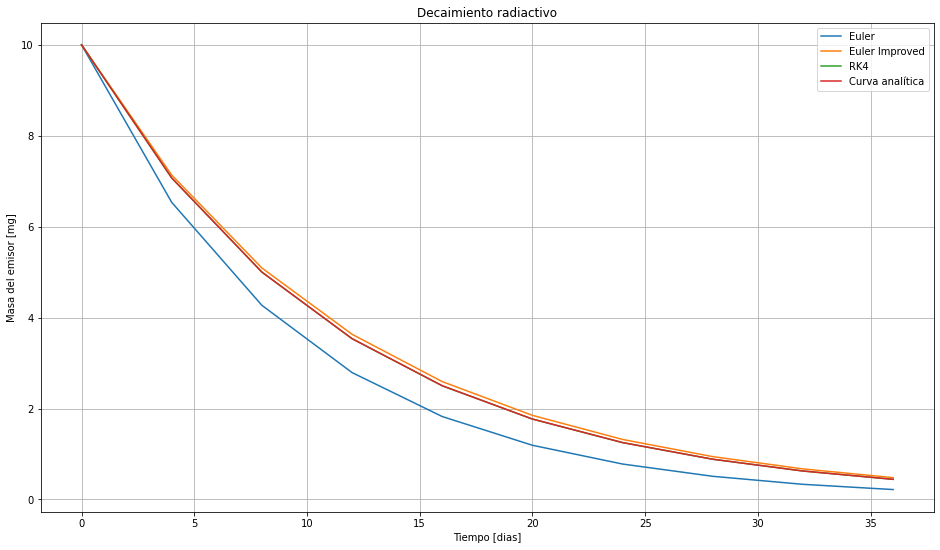

In [5]:
# Solución analítica de la ecuación diferencial
f_teo = lambda t: 10*np.exp(-l*t)

t1,N1 = euler(f, [0,10], 40, 4)
t2,N2 = euler_improved(f, [0,10], 40, 4)
t3,N3 = rk4(f, [0,10], 40, 4)

plt.figure(figsize=(16,9))
plt.title("Decaimiento radiactivo")
plt.xlabel("Tiempo [dias]")
plt.ylabel("Masa del emisor [mg]")

plt.plot(t1, N1, label = 'Euler')
plt.plot(t2, N2, label = 'Euler Improved')
plt.plot(t3, N3, label = 'RK4')
plt.plot(t1, f_teo(t1), label = 'Curva analítica')

plt.grid()
plt.legend()
plt.show()

In [6]:
data = {'Tiempo [Dias]' : t1, 'Euler' : N1, 'Euler mejorado' : N2, 'RK4' 
        : N3, 'Valor real' : f_teo(t1)}

df = pd.DataFrame(data)
df

,Tiempo [Dias],Euler,Euler mejorado,RK4,Valor real
0,0,10.000000,10.000000,10.000000,10.000000
1,4,6.534264,7.134830,7.071462,7.071068
2,8,4.269661,5.090580,5.000557,5.000000
3,12,2.789909,3.632043,3.536125,3.535534
4,16,1.823000,2.591401,2.500557,2.500000
5,20,1.191197,1.848921,1.768259,1.767767
6,24,0.778359,1.319173,1.250418,1.250000
7,28,0.508601,0.941208,0.884228,0.883883
8,32,0.332333,0.671536,0.625278,0.625000
9,36,0.217155,0.479129,0.442163,0.441942


2. El oscilador Duffing es un ejemplo de un oscilador no lineal amortiguado, el cual exhibe un comportamiento caótico. Está descrito por la ecuación diferencial

\begin{equation}
\frac{d^2x}{dt^2} = -2 \gamma \frac{dx}{dt} - \alpha x - \beta x^3 + F cos(\omega t)
\end{equation}

donde F es la acción de una fuerza periódica de frecuencia $\omega$.

Si $\alpha=-1$, $\beta=1$, $\gamma=0.15$, $\omega=1.2$, $x(0)=1$ y $x'(0)=0$. Usando el método de Runge-Kutta de cuarto orden, encuentre una solución aproximada para $x(20T)$, donde $T=2\pi/\omega$, usando h = 0.1 y diferentes valores de $F(0.15,\, 0.20,\, 0.37,\, 0.50\, y \, 0.65)$

Para cada F grafique $x(t)\,vs\,t$ y $x'(t)\,vs\,x(t)$.

In [7]:
def RK42D(f, u0, tiempo, h):
    """
    f: función de segundo orden a integrar
    u0: tupla, array o lista. u0[0] Tiempo inicial, u0[1:] Condiciones iniciales
    tiempo: tiempo final
    h: paso de integración
    """

    T = np.arange(u0[0], tiempo, h)
    # Declara un array con 2 columnas, una para cada orden de derivación
    U = np.zeros((len(T),2))

    # Primera fila con condiciones iniciales
    U[0] = u0[1:]

    # Aplica RK4 con caracter vectorial
    for i in range(len(T)-1):
        k1 = f(T[i],U[i])
        k2 = f(T[i], U[i] + h*k1/2)
        k3 = f(T[i], U[i] + h*k2/2)
        k4 = f(T[i], U[i] + h*k3)
        U[i+1] = U[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    
    return T, U

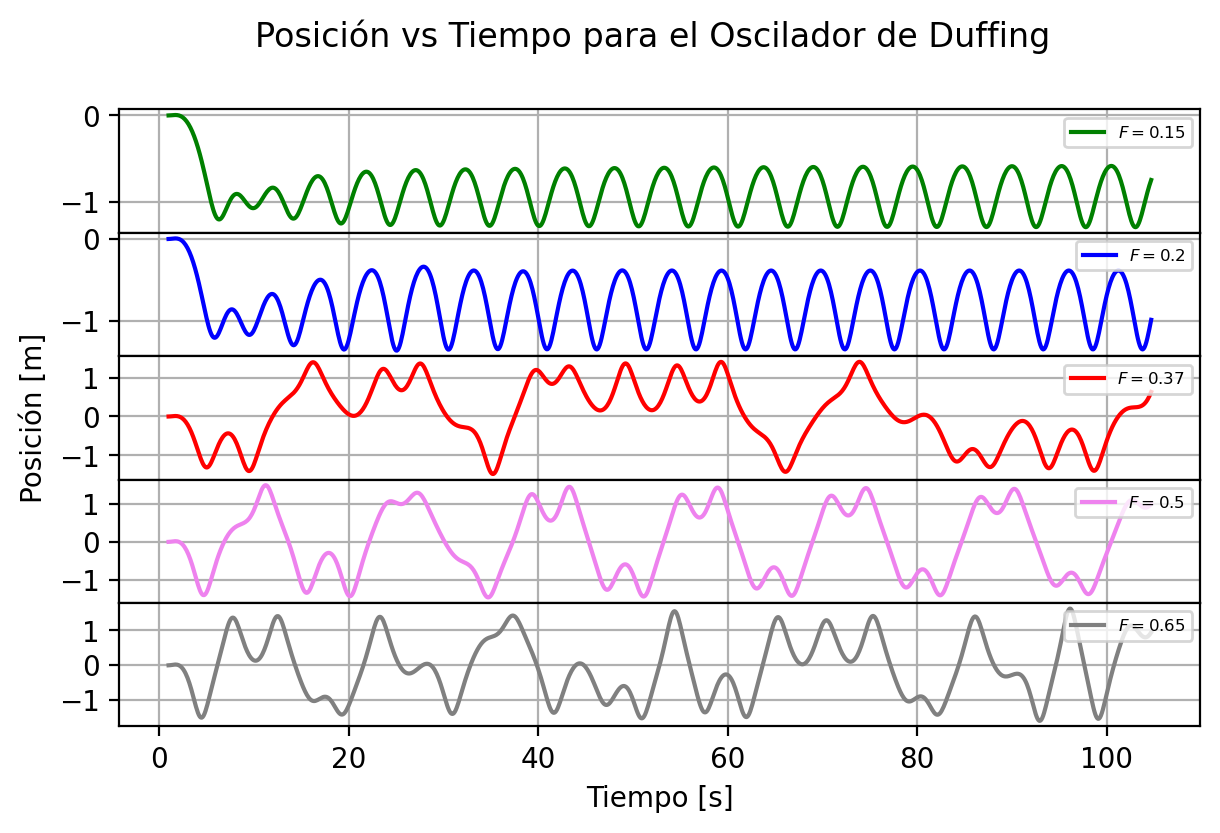

In [79]:
# Parámetros
gamma = 0.15
a = -1
b = 1
omega = 1.2

Fuerzas = [0.15, 0.20, 0.37, 0.50, 0.65]

# Lista de colores para graficar
col_dict = ['green', 'blue', 'red', 'violet', 'gray']

# Función del oscilador de Duffing
def f(t, u):
    # u[1] es dx/dt y u[0] es x. y = dx/dt
    f1 = u[1]
    f2 = -2*gamma*f1 - a*u[0] - b*u[0]**3 + F*np.cos(omega*t)
    return np.array([f1, f2])

# Declara un gráfico de 5 filas
fig, axs = plt.subplots(5, sharex=True)
fig.suptitle("Posición vs Tiempo para el Oscilador de Duffing")

# Calidad de la imagen
fig.set_dpi(200)
fig.tight_layout()

pos = 0

for i in Fuerzas:
    F = i
    # Solución de la ecuación diferencial
    T, U = RK42D(f, np.array([1, 0]), 40*np.pi/omega, 0.1)
    axs[pos].plot(T, U[:,0], color=col_dict[pos], label = '$F = {}$'.format(F))
    axs[pos].grid()
    axs[pos].legend(loc = 'upper right', prop={'size': 6})
    pos += 1

plt.xlabel("Tiempo [s]")
axs[2].set_ylabel("Posición [m]")

plt.subplots_adjust(hspace=.0)
plt.savefig("Posición.svg")
plt.show()

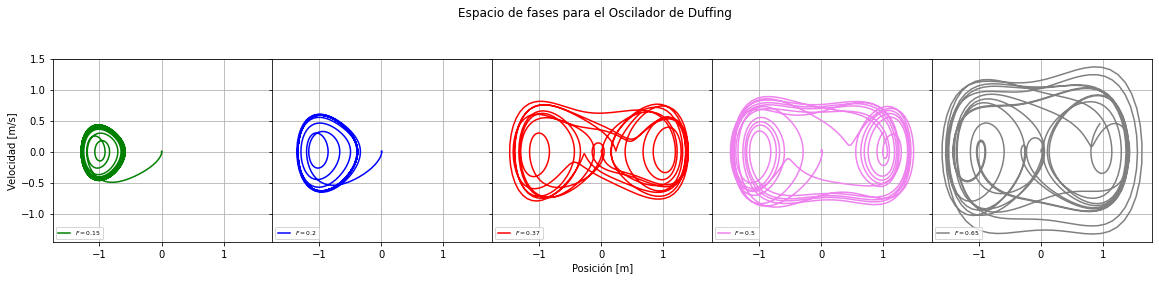

In [78]:
fig, axs = plt.subplots(1,5, sharex=True, sharey=True, figsize=(16,4))
fig.suptitle("Espacio de fases para el Oscilador de Duffing")

#fig.set_dpi(1000)
fig.tight_layout()

pos = 0

for i in Fuerzas:
    F = i
    T, U = RK42D(f, np.array([1, 0]), 40*np.pi/omega, 0.1)
    axs[pos].plot(U[:,0], U[:,1],color=col_dict[pos], label = '$F = {}$'.format(F))
    axs[pos].grid()
    axs[pos].legend(loc = 'lower left', prop={'size': 6})
    axs[pos].set_aspect('equal')
    pos += 1

axs[0].set_ylabel("Velocidad [m/s]")
axs[2].set_xlabel("Posición [m]")

plt.subplots_adjust(hspace=.0,wspace=.0)
plt.savefig("Espacio de fases.svg")
plt.show()

Las últimas gráficas se adjuntan como imágenes para una mejor visualización.